# pre-night (20-06-18)

This is the first documented night, so aspirations are not too high.  
No EEG/tES will be applied.  

**IV:** natural awakenings (no experimental manipulation)  
**DV:** sleep data from cheap smart watch(1); dream reports  

(1)Amazfit Bip; App: Amazfit Notify 9.0.4

**Links:**  
- How does Amazfit Bip track sleep? --> https://www.gearbest.com/blog/how-to/how-amazfit-bip-detect-sleep-9791

**Goals:**  
1. set up pink noise speaker to fall asleep
    - https://www.youtube.com/watch?v=K993AhPgaaA
2. every time waking up, make an auditory note of dream report
    - in the morning, try to recollect and reformulate
3. in the morning, get sleep data from smartwatch and make graph including dream reports

# post-night  (20-06-19)

## problems

* rather high motivational problems to start speaking about dreams during the night
    - missed at least one dream due to motivational problems
* Pro version of Amazfit Notify needed for data export
* bad sleep quality according to App

## data analyses

In [104]:
%matplotlib notebook
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_excel('raw_data.xlsx')

# get the two important columns: indices 1, 3, 4
stage_succ = df.iloc[:,[1,3,4]]
stage_succ

# useful function to quickly get derive datetime (string)
def get_datetime(pre_midnight, hour, minutes, seconds=0, as_string=False):
    date = "18/06/2020" if pre_midnight else "19/06/2020"
    time = str(hour).zfill(2) + ":" + str(minutes).zfill(2) + ":" + str(seconds).zfill(2)
    date_str = date + " " + time
    if as_string:
        return date_str
    else:
        return datetime.datetime.strptime(date_str, '%d/%m/%Y %H:%M:%S')

In [93]:
def str_to_datetime(datetime_str):
    #TODO str from ind
    return datetime.datetime.strptime(datetime_str, '%d/%m/%Y %H:%M:%S')

# add the last "beenden" time (column ind 1) to "beginn" (column ind 0)
# then "beenden" column is completely redundant and can be removed
last_stage_end = stage_succ.iloc[-1,1]
last_stage     = stage_succ.iloc[-1,2]

# dictionary to translate strings to sleep depths
sleep_depths = {
    "Wach":             0,
    "Leichter Schlaf": -1,
    "Tiefschlaf":      -2
}

state_onsets_str = stage_succ.iloc[:,0].to_list() + [last_stage_end]
state_labels    = stage_succ.iloc[:,2].to_list() + [last_stage]
state_onsets = [str_to_datetime(s) for s in state_onsets_str]
depths_succ  = [sleep_depths[s]    for s in state_labels]

# manually add the time i went to bed / lights off (from note app and phone)
lights_off_time = datetime.datetime.strptime("18/06/2020 23:04:00", '%d/%m/%Y %H:%M:%S')
state_onsets = [lights_off_time] + state_onsets
depths_succ = [0] + depths_succ
state_onsets

[datetime.datetime(2020, 6, 18, 23, 4),
 datetime.datetime(2020, 6, 18, 23, 8),
 datetime.datetime(2020, 6, 18, 23, 49),
 datetime.datetime(2020, 6, 19, 0, 16),
 datetime.datetime(2020, 6, 19, 0, 44),
 datetime.datetime(2020, 6, 19, 1, 15),
 datetime.datetime(2020, 6, 19, 1, 27),
 datetime.datetime(2020, 6, 19, 2, 33),
 datetime.datetime(2020, 6, 19, 2, 44),
 datetime.datetime(2020, 6, 19, 7, 45)]

In [94]:
# make boxcar --> for plot
def get_boxcars(state_onsets, depths_succ):
    boxcar_times  = []
    boxcar_depths = []
    for i in range(len(state_onsets)):
        current_time = state_onsets[i]
        last_state   = depths_succ[i - 1] if i > 0 else 0
        boxcar_times.append(current_time)
        boxcar_times.append(state_onsets[i])
        boxcar_depths.append(last_state)
        boxcar_depths.append(depths_succ[i])
    # make it look nicer: show last (final) wake stage (--> daytime)
    boxcar_times.append(state_onsets[-1])
    boxcar_depths.append(0)
    # already convert datetimes to plt numbers at this point (since this function is only important for plotting anyway)
    dates = matplotlib.dates.date2num(boxcar_times)
    return [dates, boxcar_depths]

<IPython.core.display.Javascript object>


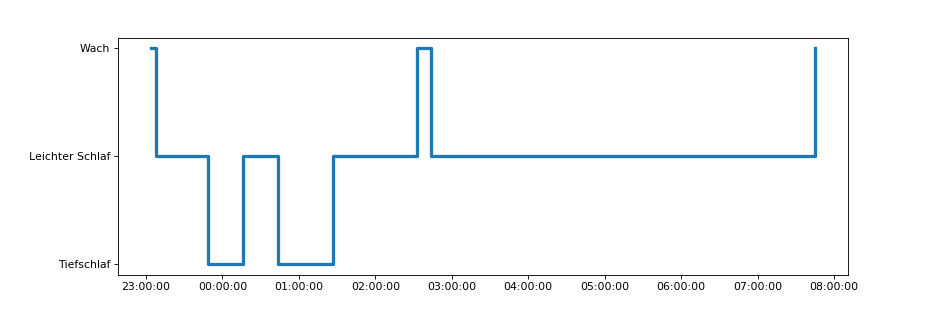

In [116]:
# make a plot of depths over time

def get_ax(state_onsets, depths_succ):
    bc = get_boxcars(state_onsets, depths_succ)
    ax.plot_date(bc[0], bc[1], xdate=True, linestyle='solid', marker='None', linewidth=3)
    #ax.plot_date(state_onsets, depths_succ, xdate=True, linestyle='solid', marker='None')
    fmt = matplotlib.dates.DateFormatter('%H:%M:%S')
    plt.gca().xaxis.set_major_formatter(fmt)
    ax.set_yticks(list(sleep_depths.values()))    
    ax.set_yticklabels(list(sleep_depths.keys()))
    return ax

fig, ax = plt.subplots(figsize=(12,4))
ax = get_ax(state_onsets, depths_succ)

In [122]:
# manually add the time points of dream report onsets
report_times = [
    [False,2,33,13],
    #[False,2,39,56],
    #[False,2,43,25],
    [False,4,12,0],
    [False,7,24,27]
]

dts_reports = []
for rt in report_times:
    dt_object = get_datetime(*rt)
    date = matplotlib.dates.date2num(dt_object)
    dts_reports.append(date)

<IPython.core.display.Javascript object>


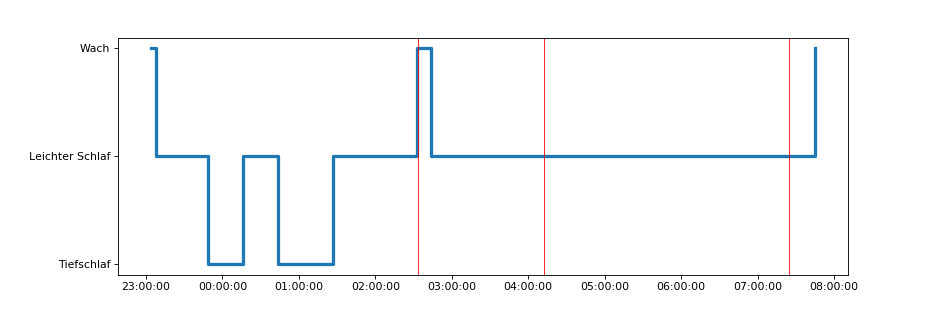

In [123]:
fig, ax = plt.subplots(figsize=(12,4))
ax = get_ax(state_onsets, depths_succ)
for dtr in dts_reports:
    plt.axvline(x=dtr, c="red", linewidth=0.75)

3

## what i've learned

## try sometime next:

* switch Amazfit Notify to english for easier scripting based on data export
* program trigger in the pink noise streams for later EEG analyses
* streamline how to store the "time to bed" time